### Basics of Pytorch

- All Imports are in this cell

In [28]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


In [29]:
# Some example matrices for matrix multiplication in numpy

x = [[1, 2, 3], [4, 5, 6], [7, 8, 9]] # 3x3 matrix
y = [[3] , [2] , [1]] # 3x1 matrix

np_x = np.array(x)
np_y = np.array(y)

print(f"Matrix multiplication in numpy: \n {np.matmul(np_x, np_y)}")

Matrix multiplication in numpy: 
 [[10]
 [28]
 [46]]


In [30]:
x_tensor = torch.FloatTensor(x)
y_tensor = torch.FloatTensor(y)

b_torch = torch.ones(3, 1) # 3x1 matrix of ones

print(f"Matrix multiplication and b_torch addition in pytorch: \n {torch.matmul(x_tensor, y_tensor) + b_torch}")

Matrix multiplication and b_torch addition in pytorch: 
 tensor([[11.],
        [29.],
        [47.]])


In [31]:
y = torch.rand(3 , 2 , 3 , 1)
print(y)   # 4D tensor i.e 3 matrices of 2 x 3 x 1


print(f"Minimum value of tensor is : " , y.min())  # gives minimum value in whole tensor i.e global minimum

tensor([[[[0.8746],
          [0.3806],
          [0.7614]],

         [[0.9457],
          [0.6129],
          [0.2130]]],


        [[[0.4618],
          [0.7922],
          [0.2846]],

         [[0.3574],
          [0.8054],
          [0.6718]]],


        [[[0.5247],
          [0.6463],
          [0.2630]],

         [[0.6870],
          [0.9965],
          [0.2740]]]])
Minimum value of tensor is :  tensor(0.2130)


In [32]:
x = torch.ones(2, 3)

print(x * 10 + 3)  # broadcasting in pytorch

tensor([[13., 13., 13.],
        [13., 13., 13.]])


In [33]:
x_tensor.reshape(1, 9)  # reshaping tensor to 1x9 from 2x3

tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]])

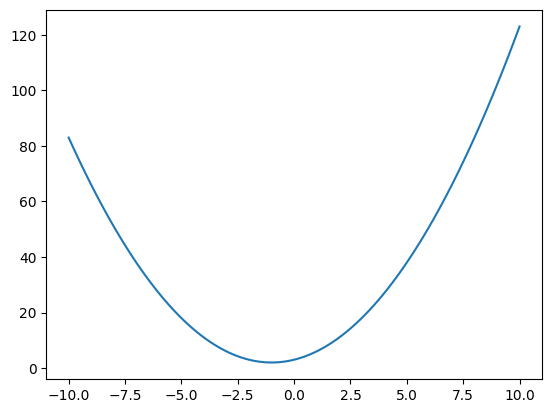

In [34]:
fx = lambda x : x**2 + 2*x + 3

x = np.linspace(-10, 10 , 100)

plt.plot(x , fx(x))

In [35]:
x_ = torch.randn(1 , requires_grad=True)  # A random number tensor
y_ = fx(x_)
y_.backward()
grad_x_ = x_.grad.item()
print(f"When x = {x_.item()} , then grad of fx at x is {grad_x_}")


When x = 0.09117639064788818 , then grad of fx at x is 2.1823527812957764


In [36]:
# Gradient descent Implementation in pytorch

def fx(x):
    return x**2 + 3*x + 2  # Example: a simple quadratic

x_ = torch.randn(1 , requires_grad=True)  # A random number tensor
learning_rate = 0.01
n_iters = 0
x_logger = []
y_logger = []
dy_dx = 100000  # just a large value to start with

while np.abs(dy_dx) > 0.001 :
    y_ = fx(x_)
    y_.backward()
    dy_dx = x_.grad.item()
    with torch.no_grad():
        x_ -= learning_rate * dy_dx
        x_logger.append(x_.item())
        y_logger.append(y_.item())
        x_.grad.zero_()  # setting gradient to zero after every step
    n_iters += 1

print(f"Minimum value of fx is at x = {x_.item()} , fx = {fx(x_).item()} after {n_iters} iterations with gradient of {dy_dx}")

Minimum value of fx is at x = -1.499516248703003 , fx = -0.2499995231628418 after 449 iterations with gradient of 0.0009872913360595703


In [37]:

# A simple Linear model using nn.Module class
class LinearModel(nn.Module):
    def __init__(self , input_dim , output_dim):
        super().__init__()
        self.w = nn.Parameter(torch.randn(input_dim , output_dim , requires_grad=True))
        self.b = nn.Parameter(torch.randn(1 , output_dim , requires_grad=True))

    def forward(self, x) -> torch.Tensor:
        return x @ self.w + self.b

In [38]:
input_data = torch.randn(3 , 2)  # 3 samples of 2 features each
model = LinearModel(2 , 1)  # input dimension is 2 and output dimension is 1

output = model(input_data)


print(output.shape)
print(output.detach())  # Forward pass through the model to get predictions

torch.Size([3, 1])
tensor([[ 1.9018],
        [-0.6911],
        [ 3.2459]])


In [39]:
linear = nn.Linear(2 , 1)  # input dimension is 2 and output dimension is 1
optimizer = torch.optim.SGD(linear.parameters() , lr=0.01)  # Stochastic Gradient Descent optimizer
loss = nn.MSELoss()  # Mean Squared Error loss function
testing_output = torch.randn(3 , 1)  # assuming some random target values
loss_history = []


for epoch in range(1000):
    y_pred = linear(input_data) # Forward pass
    l = loss(y_pred , testing_output)  # using the random target values
    l.backward()  # Backward pass to compute gradients
    optimizer.step()  # Update weights
    optimizer.zero_grad()  # Zero the gradients after updating
    loss_history.append(l.item())
    if epoch % 100 == 0:
        print(f"Epoch {epoch} : Loss = {l.item():2f}")


Epoch 0 : Loss = 1.698591
Epoch 100 : Loss = 0.130803
Epoch 200 : Loss = 0.056903
Epoch 300 : Loss = 0.026196
Epoch 400 : Loss = 0.012207
Epoch 500 : Loss = 0.005704
Epoch 600 : Loss = 0.002667
Epoch 700 : Loss = 0.001247
Epoch 800 : Loss = 0.000583
Epoch 900 : Loss = 0.000273


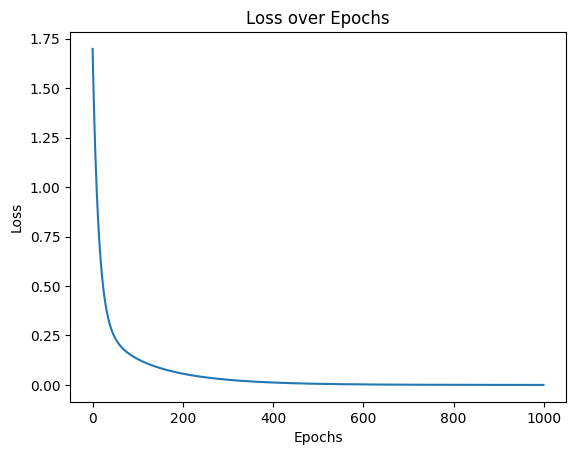

In [40]:
plt.plot(loss_history)  # Plotting the loss history to see the decrease in loss over epochs
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.show()